### Example of computing binned reduced bispectrum

In [21]:
# load modules
import numpy as np
import basic
import curvedsky
from matplotlib.pyplot import *

In [22]:
# define parameters
Tcmb = 2.726e6 # CMB temperature
lmax = 1024    # maximum multipole of output normalization
bn   = 20      # number of multipole bins

In [23]:
# choose multipoles within a multipole bin
bp = np.array([np.int(lmax*(i/bn)) for i in range(bn+1)])
bc = (bp[1:]+bp[:-1])*.5
sL = bp[:2]

In [24]:
# load unlensed and lensed Cls
ucl = basic.aps.read_cambcls('../data/unlensedcls.dat',2,lmax,5)/Tcmb**2

In [38]:
# generate gaussian phi
l = np.linspace(0,lmax,lmax+1)
glm = curvedsky.utils.gauss1alm(lmax,ucl[3,:]*l**2*(l+1)**2/4.)

In [39]:
# compute pmap = gmap + gmap**2
plm = curvedsky.bispec.make_quad_gauss(lmax,glm)

In [40]:
# compute binned bispectra
bl = np.zeros((4,bn))

In [41]:
hl = curvedsky.bispec.bispec_norm(bn,bp,bstype='equi')
bl[0,:] = curvedsky.bispec.bispec_bin(bn,bp,lmax,plm,bstype='equi') * np.sqrt(4*np.pi)/hl

In [42]:
hl = curvedsky.bispec.bispec_norm(bn,bp,bstype='fold')
bl[1,:] = curvedsky.bispec.bispec_bin(bn,bp,lmax,plm,bstype='fold') * np.sqrt(4*np.pi)/hl

In [43]:
hl = curvedsky.bispec.bispec_norm(bn,bp,bstype='sque',sL=sL)
bl[2,:] = curvedsky.bispec.bispec_bin(bn,bp,lmax,plm,bstype='sque',sL=sL) * np.sqrt(4*np.pi)/hl

In [44]:
hl = curvedsky.bispec.bispec_norm(bn,bp,bstype='isos')
bl[3,:] = curvedsky.bispec.bispec_bin(bn,bp,lmax,plm,bstype='isos')* np.sqrt(4*np.pi)/hl

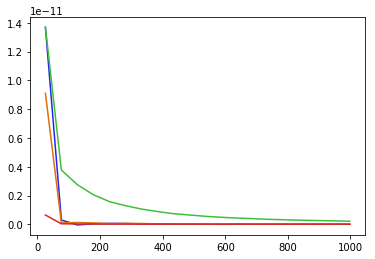

In [47]:
#yscale('log')
s = 1.
plot(bc,s*bl[0,:])
plot(bc,s*bl[1,:])
plot(bc,s*bl[2,:])
plot(bc,s*bl[3,:])